## Práctica 6. Visualización de datos geoespaciales - Vector

Esta práctica está basada en el libro [Geographic Data Science with R: Visualizing and Analyzing Environmental Change](https://www.bookdown.org/mcwimberly/gdswr-book/).

Se implementarán visualizaciones sobre datos históricos de tornados en Oklahoma

#### 1. Importar datos

Los archivos que se cargarán están en formato .shp.  Para leerlos se utiliza la función `st_read()`.  Todos los archivos (.dbf, .prj, .shp, etc.) del formato shapefile deben estar en el mismo directorio de trabajo.  

1. Descargue el archivo TornadosOklahoma.zip y descomprímalo en su directorio de trabajo.
2. Lea los archivos con los contornos de los condados de Oklahoma, el origen de los tornados y sus trayectorias. *Observe que aunque al parecer se está leyendo un solo archivo en cada sentencia, en realidad, se están cargando datos de varios archivos con el mismo nombre.*

In [39]:
library(sf)
library(units)
library(dplyr)
library(ggplot2)
okcounty <- st_read("/Users/gerardoguerrero/vis/assets/geospacials/TornadosOklahoma/ok_counties.shp", quiet = TRUE)
tpoint <- st_read("/Users/gerardoguerrero/vis/assets/geospacials/TornadosOklahoma/ok_tornado_point.shp", quiet = TRUE)
tpath <- st_read("/Users/gerardoguerrero/vis/assets/geospacials/TornadosOklahoma/ok_tornado_path.shp", quiet = TRUE)


---

**PREGUNTA 1** ¿Qué clase de objeto son okcounty, tpoint y tpath?

¿Qué tipo de objetos geométrico tienen cada uno de esos archivos? (Ayuda: utilice la función `glimpse` o la función `head`),


In [40]:
print(class(okcounty))
print(class(tpoint))
print(class(tpath))


[1] "sf"         "data.frame"
[1] "sf"         "data.frame"
[1] "sf"         "data.frame"


Se tratan de dataframes.

In [41]:
glimpse(okcounty)

Rows: 77
Columns: 8
$ STATEFP  <chr> "40", "40", "40", "40", "40", "40", "40", "40", "40", "40", "~
$ COUNTYFP <chr> "077", "025", "011", "107", "105", "153", "001", "053", "059"~
$ COUNTYNS <chr> "01101826", "01101800", "01101793", "01101841", "01101840", "~
$ AFFGEOID <chr> "0500000US40077", "0500000US40025", "0500000US40011", "050000~
$ GEOID    <chr> "40077", "40025", "40011", "40107", "40105", "40153", "40001"~
$ NAME     <chr> "Latimer", "Cimarron", "Blaine", "Okfuskee", "Nowata", "Woodw~
$ LSAD     <chr> "06", "06", "06", "06", "06", "06", "06", "06", "06", "06", "~
$ geometry <POLYGON [arc_degree]> POLYGON ((-95.50766 35.0292..., POLYGON ((-1~


In [42]:
glimpse(tpoint)

Rows: 4,092
Columns: 23
$ om       <dbl> 192, 27, 38, 57, 60, 61, 50, 52, 96, 108, 113, 117, 119, 76, ~
$ yr       <dbl> 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1~
$ mo       <dbl> 10, 2, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ~
$ dy       <dbl> 1, 27, 27, 28, 28, 28, 2, 3, 11, 16, 22, 24, 29, 4, 4, 4, 7, ~
$ date     <chr> "1950-10-01", "1950-02-27", "1950-03-27", "1950-04-28", "1950~
$ time     <chr> "21:00:00", "10:20:00", "03:00:00", "14:17:00", "19:05:00", "~
$ tz       <dbl> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3~
$ st       <chr> "OK", "OK", "OK", "OK", "OK", "OK", "OK", "OK", "OK", "OK", "~
$ stf      <dbl> 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 4~
$ stn      <dbl> 23, 1, 2, 5, 6, 7, 3, 4, 15, 16, 17, 18, 19, 8, 9, 10, 11, 12~
$ mag      <dbl> 1, 2, 2, 3, 4, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1~
$ inj      <dbl> 0, 0, 0, 1, 32, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, ~
$ fat      <dbl>

Son archivos de tipo shape, pero cada una tiene un geometry type distinto: okcounty es de tipo polygon, tpoint es de tipo point y tpath es de tipo linestring.


---

---

**PREGUNTA 2** El dataframe okcounty tiene los polígonos de los condados del estado de Oklahoma. Grafíquelo sin rellenar los condados. Suba la gráfica obtenida


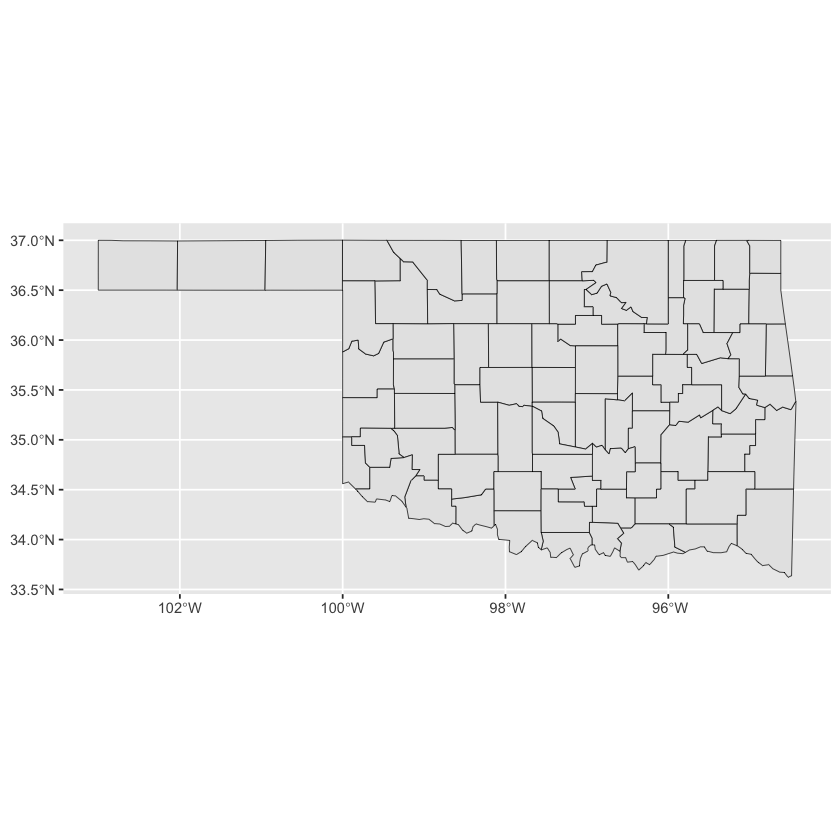

In [43]:
ggplot(data = okcounty) + 
  geom_sf(color = "black")


---


El dataset tornado tiene datos de 1950 a 2021, por lo que debemos filtrarlo si queremos graficar años específicos.  La columna `yr` indica el año en el que se presentó el tornado; la columna `om`  tiene un identificador único (UID) del tornado y  `date` la fecha en que apareció.  Vamos a crear un dataframe sólo con esas tres columnas para tornados entre 2016 y 2021:

In [44]:
tpoint_16_21 <- tpoint %>%
  filter(yr >= 2016 & yr <= 2021) %>%
  select(om, yr, date)

tpath_16_21 <- tpath %>%
  filter(yr >= 2016 & yr <= 2021) %>%
  select(om, yr, date)

Como todos los archivos tienen el mismo sistema de coordenadas (CRS), los podemos combinar en un mismo mapa.

---
**PREGUNTA 3.** ¿Qué CRS y qué Datum tienen? Ayuda: Utilice la función `st_crs()`


In [45]:
st_crs(okcounty)

Coordinate Reference System:
  User input: NAD83 
  wkt:
GEOGCRS["NAD83",
    DATUM["North American Datum 1983",
        ELLIPSOID["GRS 1980",6378137,298.257222101,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4269]]

In [46]:
st_crs(tpoint_16_21)

Coordinate Reference System:
  User input: NAD83 
  wkt:
GEOGCRS["NAD83",
    DATUM["North American Datum 1983",
        ELLIPSOID["GRS 1980",6378137,298.257222101,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4269]]

In [47]:
st_crs(tpath_16_21)

Coordinate Reference System:
  User input: NAD83 
  wkt:
GEOGCRS["NAD83",
    DATUM["North American Datum 1983",
        ELLIPSOID["GRS 1980",6378137,298.257222101,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4269]]


---

Como cada capa tiene un dataset distinto, éste debe especificarse en cada llamada a *geom_sf()* como se muestra en el siguiente snippet, en el que graficamos los condados junto con los puntos en que apareció el tornado:


---
**PREGUNTA 4**  Muestre la gráfica resultante


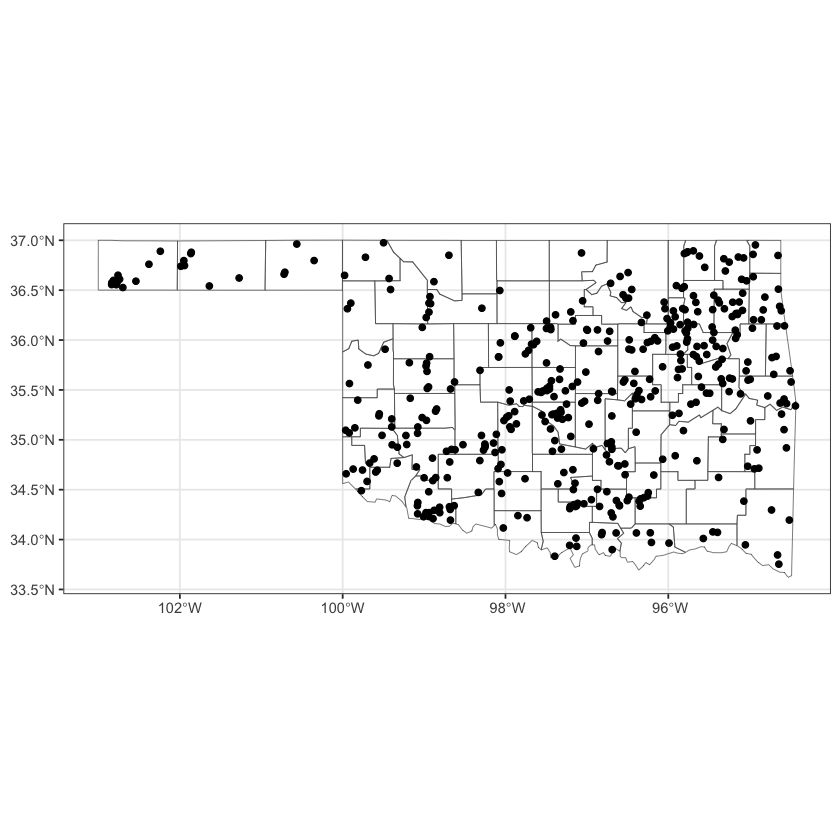

In [48]:
ggplot() +
  geom_sf(data = okcounty, fill = NA) +
  geom_sf(data = tpoint_16_21) +
  theme_bw()


---

---
**PREGUNTA 5** Añada una capa con las trayectorias de los tornados.  Para distinguirlas, coloree las trayectorias en rojo.  Muestre la gráfica resultante


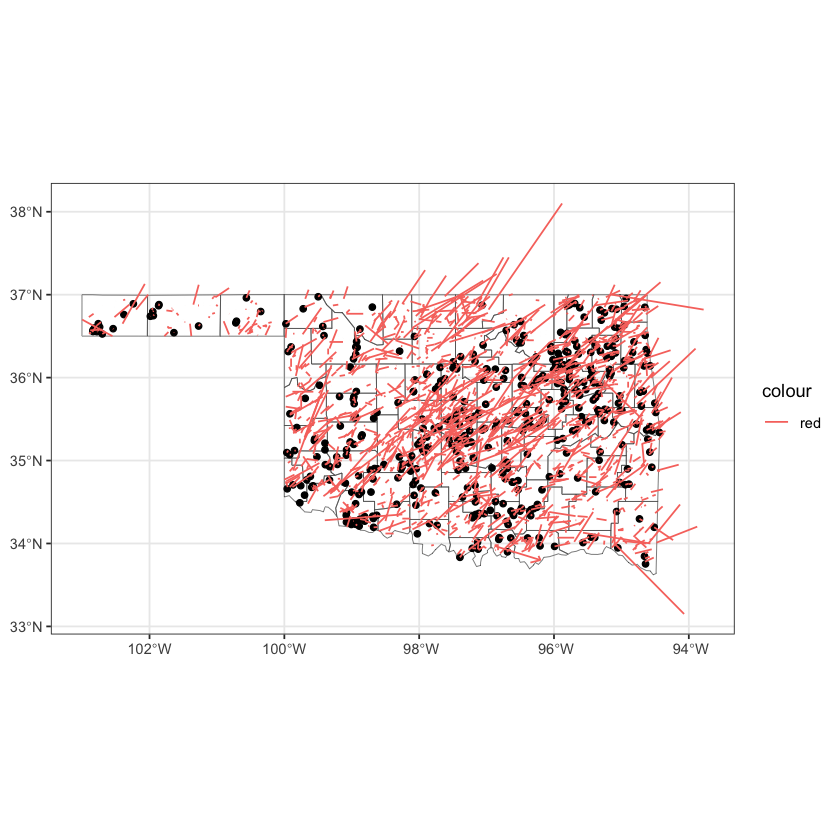

In [51]:
ggplot() +
  geom_sf(data = okcounty, fill = NA) +
  geom_sf(data = tpoint_16_21) +
  geom_sf(data=tpath, aes(col="red"))+
  theme_bw()


---

Podemos distinguir en qué año apareció cada tornado con distintos colores. Para ello, debemos hacer que el año sea una variable categórica.  En el siguiente snippet, la función `scale_color_discrete()` se utiliza para asignar los nombres adecuados a la leyenda:

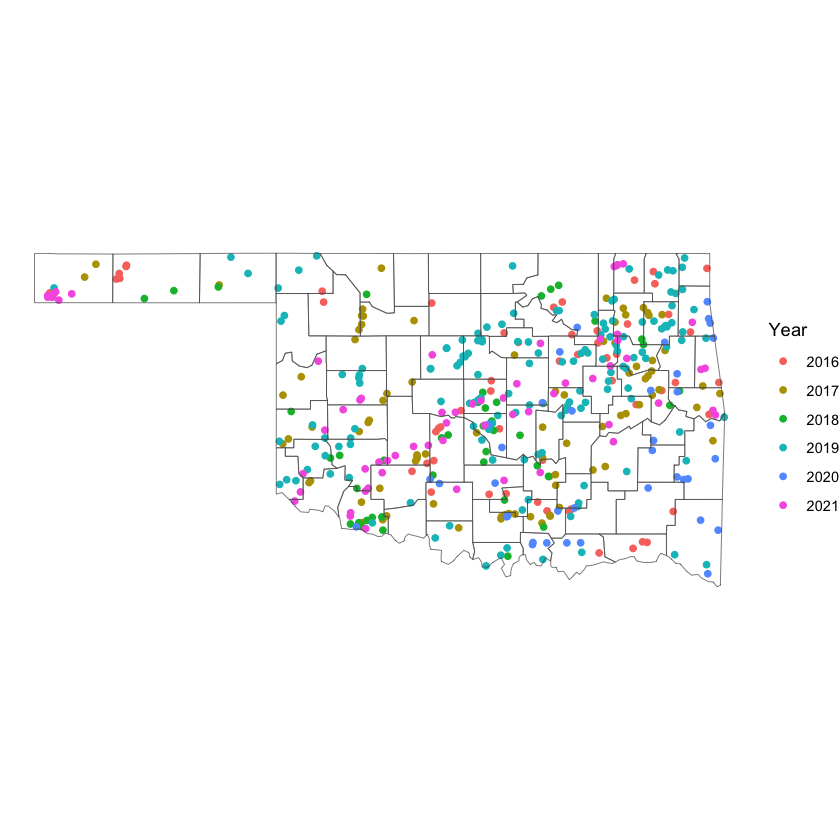

In [52]:
ggplot() +
  geom_sf(data = tpoint_16_21,
          aes(color = as.factor(yr))) +
  geom_sf(data = okcounty, fill = NA) +
  scale_color_discrete(name = "Year") +
  coord_sf(datum = NA) +
  theme_void()

![](https://drive.google.com/uc?export=view&id=1IR-SlOMC9u5spAxgILoSejfvO5MRm4C6)


---
**PREGUNTA 6.** Muestre la figura anterior pero cambiando la paleta de colores: `scale_color_brewer(palette=1)`


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


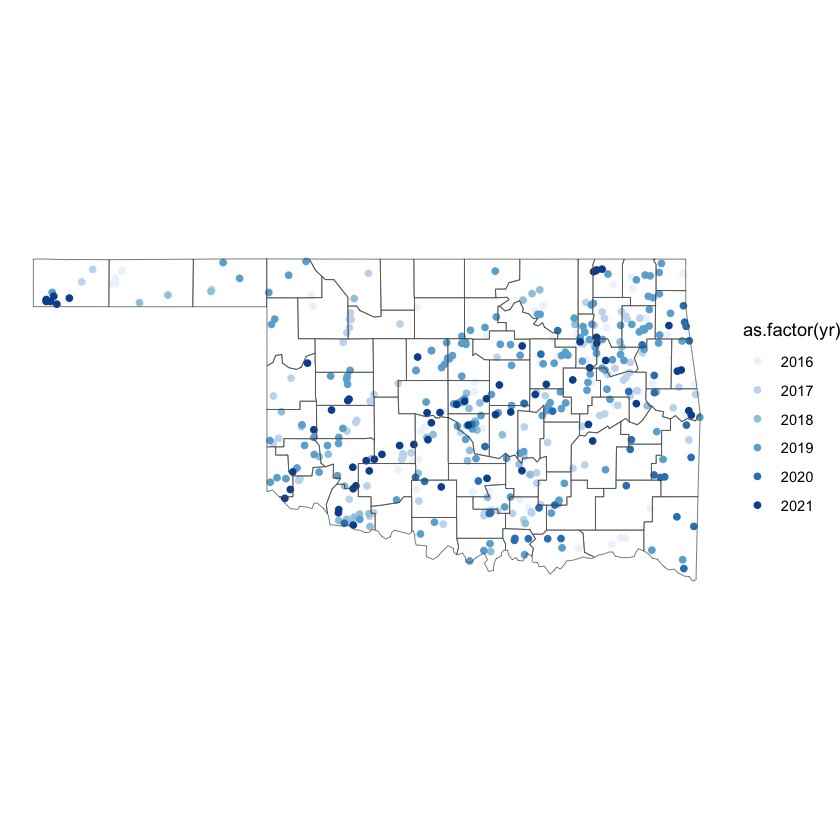

In [53]:
ggplot() +
  geom_sf(data = tpoint_16_21,
          aes(color = as.factor(yr))) +
  geom_sf(data = okcounty, fill = NA) +
  scale_color_discrete(name = "Year") +
  scale_color_brewer(palette=1) +
  coord_sf(datum = NA) +
  theme_void()


---

#### 2. Operaciones sobre regiones geográficas

Como hemos mencionado, en los sistemas de información geográfica podemos realizar operaciones con capas que caen dentro de una misma región.  En este caso, calcularemos el número de tornados por condado y posteriormente desplegaremos esa información en el mapa con distintos canales visuales.

El primer paso es relacionar renglones de las dos tablas (en el siguiente ejemplo, la que tiene los polígonos y la de los tornados) con base en su ubicación espacial. Esto se hace con la función `st_join`.


In [54]:
countypnt <- st_join(tpoint_16_21, okcounty)

---
**PREGUNTA 7** ¿Cuántas observaciones y cuántas columnas tienen los dataframes okcounty, tpoint_16_21 y countypnt?


In [56]:
print(dim(okcounty))
print(dim(tpoint_16_21))
print(dim(countypnt))

[1] 77  8
[1] 434   4
[1] 434  11


okcokunty tiene 77 observaciones y 8 columnas

tpoint_16_21, countypnt tienen la misma contidad de observaciones con 434. En cuánto a las columnas, tpoint_16_21 tiene 4 y countypnt tiene 11.


---


Como pudo notar, todavía tenemos un registro por tornado pero con información de okcounty que nos permitirá establecer relaciones entre los dos dataframes.

Pero antes, debemos preparar los datos, es decir, contar el número de tornados por condado. Para ello es necesario:

1. Convertir el objeto sf en un dataframe (función `st_drop_geometry()`)
2. Agrupar el nuevo dataframe por el identificador de condado (`GEOID`)
3. Calcular la suma, es decir, el número de ocurrencias por condado (función `summarize` con argumento `n()`)

In [20]:
countypnt <- st_drop_geometry(countypnt)
countysum <- countypnt %>%
  group_by(GEOID) %>%
  summarize(tcnt = n())

---
**PREGUNTA 8.** ¿Qué dimensiones tiene `countysum`? Al parecer, ¿Cuántos condados no tuvieron tornados en los años analizados?


In [57]:
print(dim(countysum))

[1] 75  2


Countysum tiene 2 columnas y tiene 75 columnas. Por lo tanto 359 condados no tuvieron tornados en esos años.


---

Ahora estamos en posibilidad de unir (en el sentido de una base de datos) los dos dataframes. Como hay menos condados en countypnt que en okcounty, haremos un left_joint y nos aseguramos que los 'NA' de okcounty sean remplazados por '0' (hubo cero tornados en esos condados).   

La función `st_area()` calcula el área de un polígono. La utilizaremos con `mutate` para calcular el área de todos los condados y a partir de ella, podemos calcular la densidad de tornados por condado:

In [58]:
countymap <- okcounty %>%
  left_join(countysum, by = "GEOID") %>%
  replace(is.na(.), 0) %>%
  mutate(area = st_area(okcounty),
         tdens = 10^6 * 10^3 * tcnt / area) %>%
  drop_units()

---
**PREGUNTA 9.** ¿Cuántos renglones y columnas tiene countymap?  ¿Qué columnas adicionales tiene con relación a okcounty?


In [62]:
print(dim(countymap))
print(countymap)

[1] 77 11
Simple feature collection with 77 features and 10 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -103.0025 ymin: 33.62184 xmax: -94.43151 ymax: 37.00163
Geodetic CRS:  NAD83
First 10 features:
   STATEFP COUNTYFP COUNTYNS       AFFGEOID GEOID       NAME LSAD tcnt
1       40      077 01101826 0500000US40077 40077    Latimer   06    1
2       40      025 01101800 0500000US40025 40025   Cimarron   06   12
3       40      011 01101793 0500000US40011 40011     Blaine   06    1
4       40      107 01101841 0500000US40107 40107   Okfuskee   06   10
5       40      105 01101840 0500000US40105 40105     Nowata   06    6
6       40      153 01101864 0500000US40153 40153   Woodward   06    2
7       40      001 01101788 0500000US40001 40001      Adair   06    6
8       40      053 01101814 0500000US40053 40053      Grant   06    0
9       40      059 01101817 0500000US40059 40059     Harper   06    4
10      40      073 01101824 0500000US40073 40073 Kingfisher   06

Tiene 11 columnas y 77 renglones. Tiene la varaiable geometry para poder graficar, algunos strings como el nombre y GEOID; y a parte el área y densidad.



---

---

**PREGUNTA 10.** ¿Qué condados no tuvieron tornados en el periodo analizado?


In [ ]:
st_write(countymap, "oktornado.geojson",
         layer_options = "RFC7946 = YES")


In [64]:

counties_without_tornado <- subset(countymap, tcnt == 0)
glimpse(counties_without_tornado)

Rows: 2
Columns: 11
$ STATEFP  <chr> "40", "40"
$ COUNTYFP <chr> "053", "003"
$ COUNTYNS <chr> "01101814", "01101789"
$ AFFGEOID <chr> "0500000US40053", "0500000US40003"
$ GEOID    <chr> "40053", "40003"
$ NAME     <chr> "Grant", "Alfalfa"
$ LSAD     <chr> "06", "06"
$ tcnt     <dbl> 0, 0
$ geometry <POLYGON [arc_degree]> POLYGON ((-98.11199 36.9982..., POLYGON ((-98.54466 36.9985..~
$ area     <dbl> 2597526414, 2279812232
$ tdens    <dbl> 0, 0


Los condados sin tornados fueron Grant y Alfalfa.



---

Si deseamos guardar nuestro dataframe en formato GeoJSON, lo podemos hacer con la función `st_write()`. Para asegurar que se utiliza la última especificación, se añade el argumento que se muestra:

In [ ]:
st_write(countymap, "oktornado.geojson",
           layer_options = "RFC7946 = YES")

Writing layer `oktornado' to data source `oktornado.geojson' using driver `GeoJSON'
options:        RFC7946 = YES 
Writing 77 features with 10 fields and geometry type Polygon.


#### 3. Visualización de datos

Ya tenemos todo lo necesario para crear nuestras visualizaciones. Hagamos la primera como un **mapa de coropletas** con la densidad por condado que calculamos atrás

---

**PREGUNTA 11** Haga lo necesario para desplegar el mapa de coropletas.  Muestre la gráfica resultante


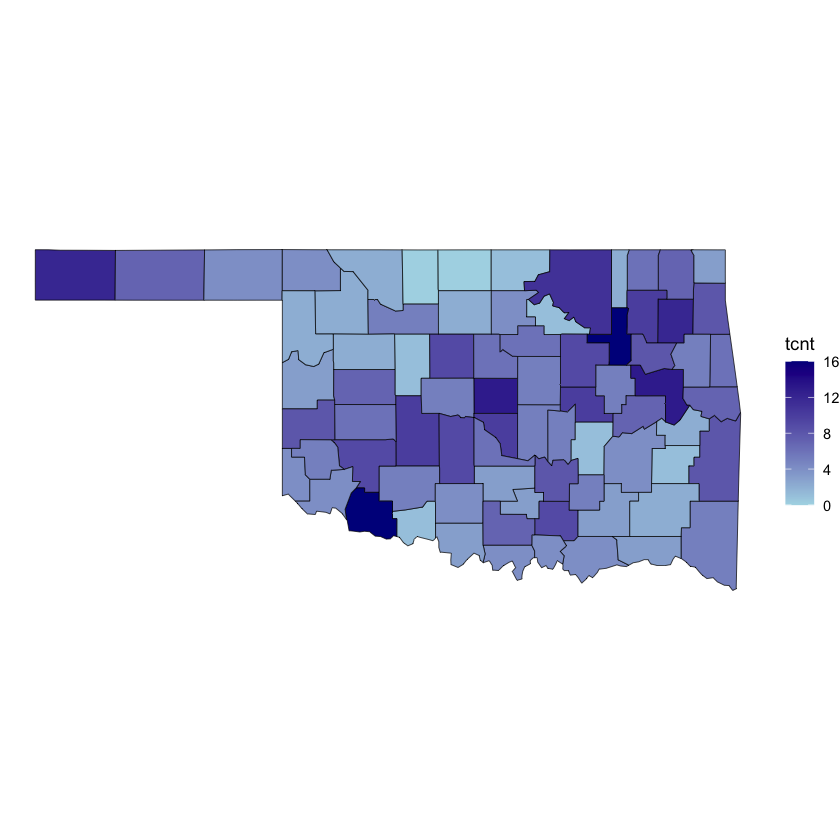

In [25]:
ggplot() +
  geom_sf(data = countymap, aes(fill = tcnt), color = "black") +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  theme_void()


---

Como ya sabemos, si lo que deseamos es mostrar el número de tornados por condado en vez de la densidad, es más conveniente utilizar un **mapa de símbolos**  utilizando el canal visual de tamaño para representar variaciones de cantidad.

Entonces, colocaremos un punto en cada condado cuyo tamaño será proporcional al número de tornados, pero ese punto debe estar en el centro del condado. Para ubicar el centro, utilizaremos la función `st_centroid()`.

Warning message:
"st_centroid assumes attributes are constant over geometries"


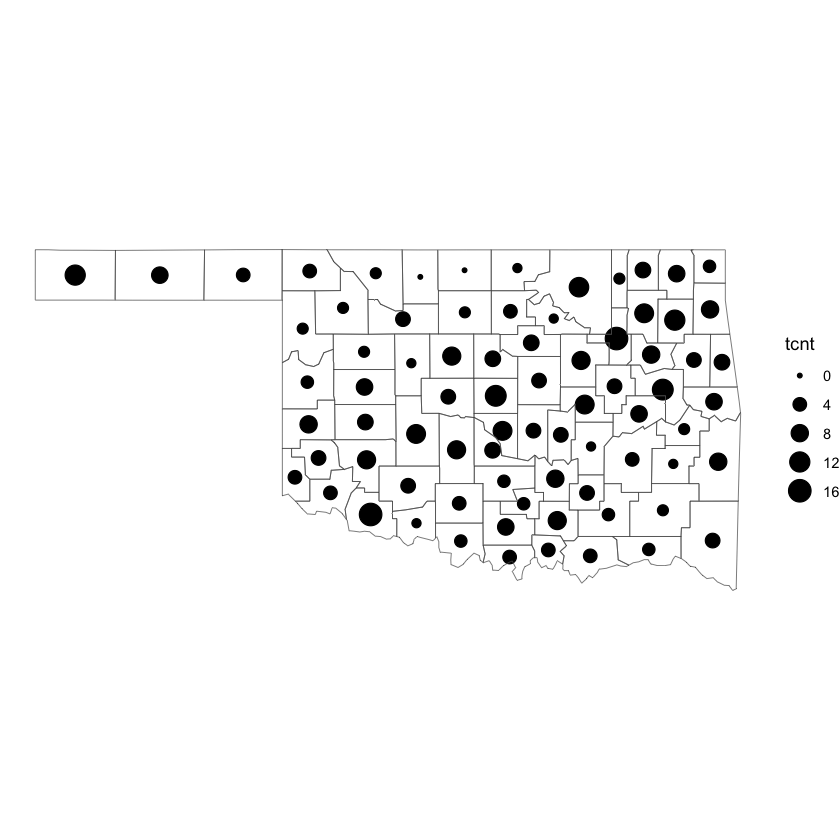

In [26]:
okcntrd = st_centroid(countymap)

ggplot() +
  geom_sf(data = okcntrd, aes(size = tcnt)) +
  geom_sf(data = okcounty, fill = NA) +
  theme_void()

---
**PREGUNTA 12** Haga el mapa anterior con el color de los condados en azul claro y el de los puntos en azul. Puede ser que deba invertir las capas o añadir un porcentaje de transparencia al relleno del condado


Warning message:
"st_centroid assumes attributes are constant over geometries"


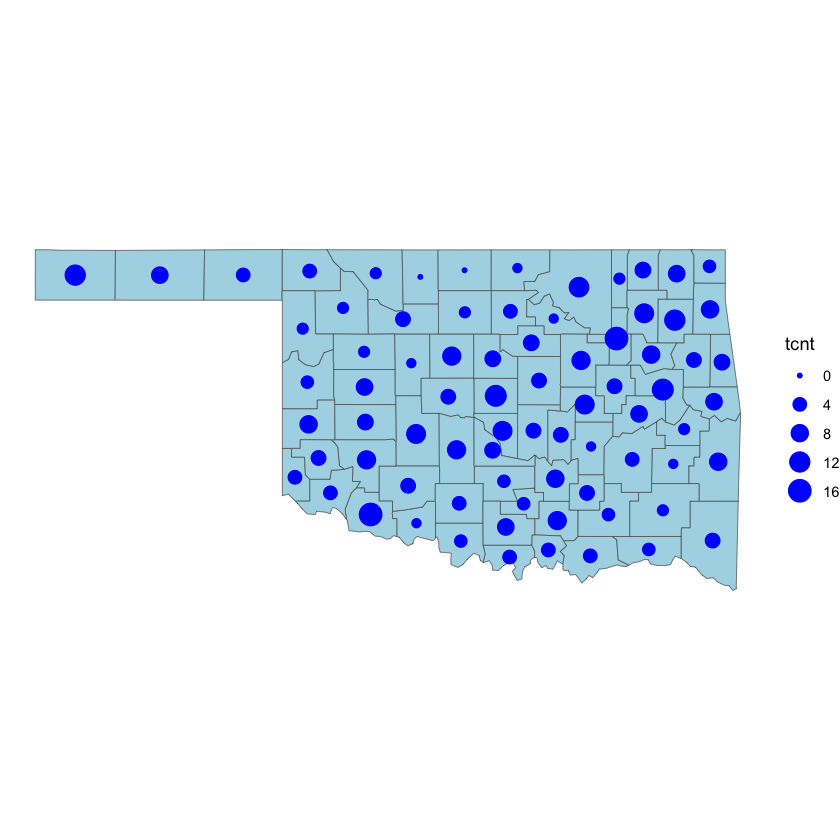

In [27]:
okcntrd = st_centroid(countymap)

ggplot() +
  geom_sf(data = okcounty, fill = "lightblue") +
  geom_sf(data = okcntrd, aes(size = tcnt), color="blue") +
  theme_void()


---

---

**PREGUNTA 13**  Regresemos a la visualización de la densidad de los tornados. Haga un mapa de coropletas con una paleta cromática de verdes (Greens)  con ayuda de la función `scale_fill_distiller`.  Para la leyenda, ponga como título "Tornados/1000 km^2". Haga un mapa de coropletas con una paleta cromática de verdes (Greens)  con ayuda de la función `scale_fill_distiller`.


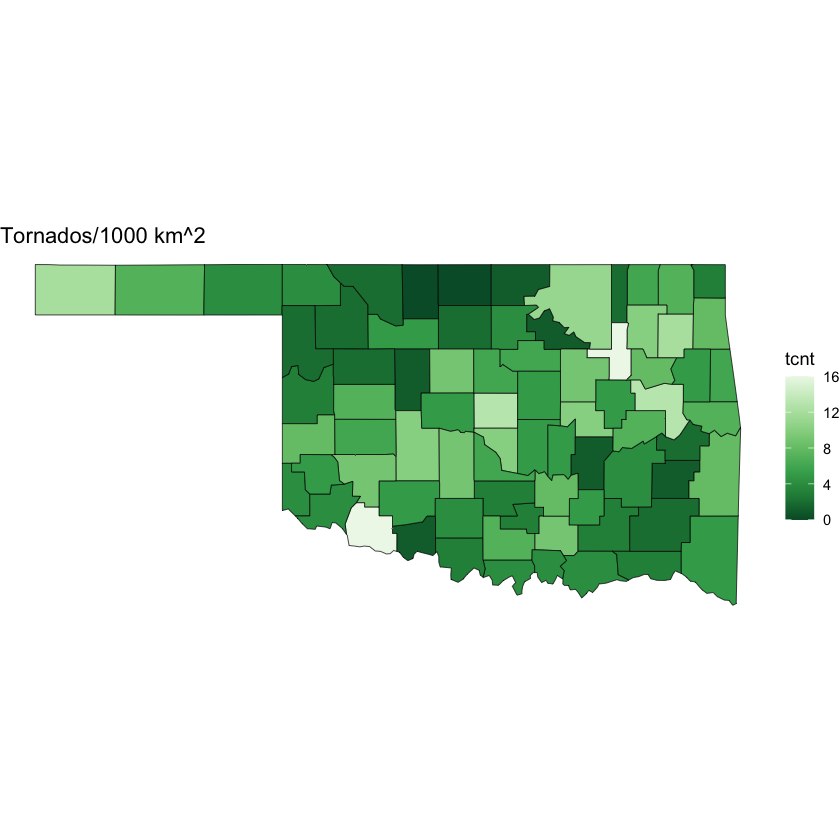

In [28]:
ggplot() +
  geom_sf(data = countymap, aes(fill = tcnt), color = "black") +
  scale_fill_distiller(palette="Greens")+
  labs(title="Tornados/1000 km^2")+
  theme_void()


---

Como sabemos, es imposible distinguir una gradación continua de tonalidades y, de hecho, muy difícil distinguir más de 8 o 10 tonalidades.  Por ello, cuando se desea representar datos cuantitativos con una escala de colores, es conveniente primero agruparlos en un número pequeño de clases (de 3 a 6) y asignar colores a esas clases.

Podemos hacer esto en R añadiendo una columna a nuestro dataset con la función `mutate()`, indicando cortes de la variable continua con la función `cut()`:

In [29]:
countymap <- countymap %>%
  mutate(tdens_c1 = cut(tdens,breaks =  4,include.lowest = T))


Como ahora tenemos una columna con una variable discreta (un factor), utilizamos la función `scale_fill_brewer()` en vez de `scale_fill_distiller()`.

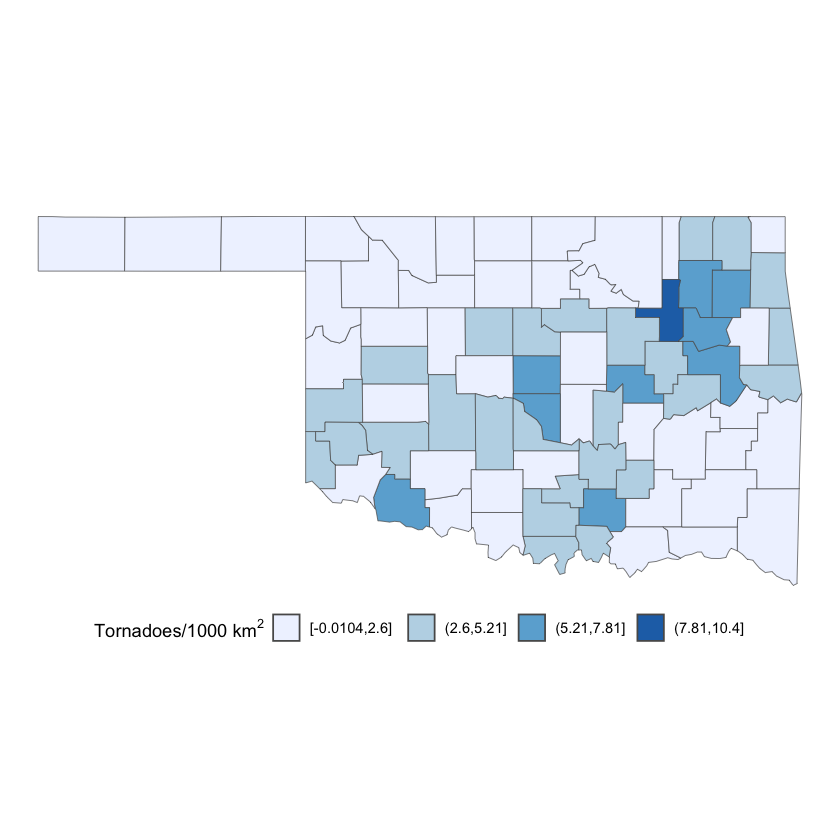

In [30]:
ggplot(data = countymap) +
  geom_sf(aes(fill = tdens_c1)) +
  scale_fill_brewer(name = expression("Tornadoes/1000 km"^2),
                    palette = "Blues") +
  theme_void() +
  theme(legend.position = "bottom")

---
**PREGUNTA 14.** Repita la figura anterior pero con seis cortes. Muestre la figura resultante


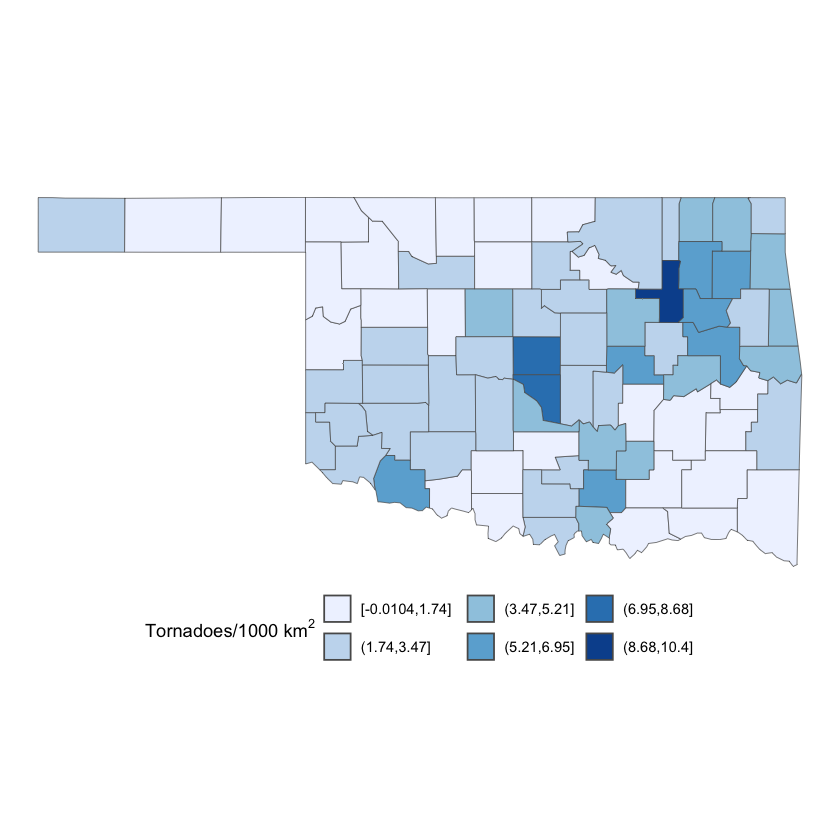

In [31]:
countymap <- countymap %>%
  mutate(tdens_c1 = cut(tdens,breaks =  6,include.lowest = T))

ggplot(data = countymap) +
  geom_sf(aes(fill = tdens_c1)) +
  scale_fill_brewer(name = expression("Tornadoes/1000 km"^2),palette = "Blues")+
  theme_void() +
  theme(legend.position = "bottom")


---

Podemos hacer lo mismo en mapas de símbolos para acotar el número de tamaños diferentes que pueden tener, por ejemplo, nuestros puntos.

---

**PREGUNTA 15.** Haga un mapa de símbolos en el que el número de tornados por condado puede caer en uno de cinco tamaños de punto.

Warning message:
"st_centroid assumes attributes are constant over geometries"


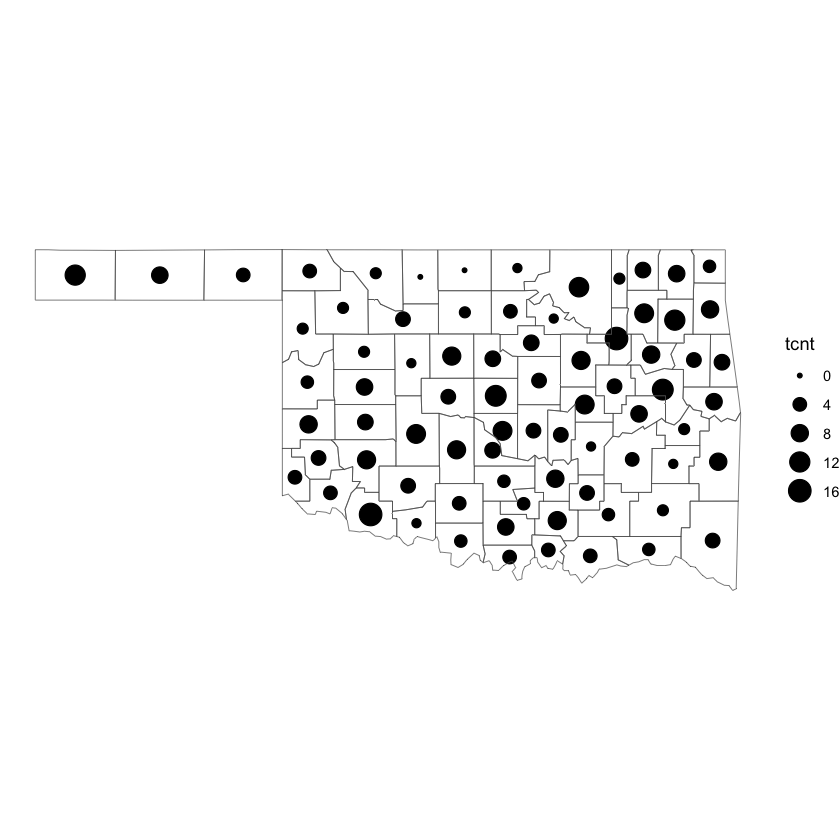

In [32]:
countymap <- countymap %>%
  mutate(tdens_c1 = cut(tcnt,breaks =  6,include.lowest = T))
okcntrd = st_centroid(countymap)

ggplot() +
  geom_sf(data = okcntrd, aes(size = tcnt)) +
  geom_sf(data = okcounty, fill = NA) +
  theme_void()